In [1]:
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing import sequence

#Import IMDB dataset:
(input_train, y_train), (input_test, y_test) = imdb.load_data(num_words=10000)

#Pad sequences:
print('Pad sequences (samples x time)')
input_train = sequence.pad_sequences(input_train, maxlen=500)
input_test = sequence.pad_sequences(input_test, maxlen=500)
print('input_train shape:', input_train.shape)
print('input_test shape:', input_test.shape)

17464789/17464789 [==============================] - 2s 0us/step
Pad sequences (samples x time)
input_train shape: (25000, 500)
input_test shape: (25000, 500)


In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, Dense

model = Sequential()
model.add(Embedding(10000, 32))
model.add(SimpleRNN(32))
model.add(Dense(1, activation = "sigmoid"))
model.compile(optimizer = "rmsprop", loss = "binary_crossentropy", metrics= ["accuracy"])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 32)          320000    
                                                                 
 simple_rnn (SimpleRNN)      (None, 32)                2080      
                                                                 
 dense (Dense)               (None, 1)                 33        
                                                                 
Total params: 322113 (1.23 MB)
Trainable params: 322113 (1.23 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [3]:
history = model.fit(input_train, y_train, epochs= 10, batch_size= 128, validation_split = 0.2)

Epoch 1/10
157/157 [==============================] - 85s 523ms/step - loss: 0.5807 - accuracy: 0.6825 - val_loss: 0.4832 - val_accuracy: 0.7924
Epoch 2/10
157/157 [==============================] - 82s 522ms/step - loss: 0.3665 - accuracy: 0.8482 - val_loss: 0.4104 - val_accuracy: 0.8112
Epoch 3/10
157/157 [==============================] - 79s 500ms/step - loss: 0.2843 - accuracy: 0.8885 - val_loss: 0.6893 - val_accuracy: 0.7418
Epoch 4/10
157/157 [==============================] - 75s 472ms/step - loss: 0.2349 - accuracy: 0.9091 - val_loss: 0.5541 - val_accuracy: 0.7976
Epoch 5/10
157/157 [==============================] - 76s 483ms/step - loss: 0.1812 - accuracy: 0.9327 - val_loss: 0.3351 - val_accuracy: 0.8620
Epoch 6/10
157/157 [==============================] - 76s 484ms/step - loss: 0.1407 - accuracy: 0.9506 - val_loss: 0.4475 - val_accuracy: 0.8402
Epoch 7/10
157/157 [==============================] - 74s 473ms/step - loss: 0.1050 - accuracy: 0.9639 - val_loss: 0.4351 - val_ac

In [4]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

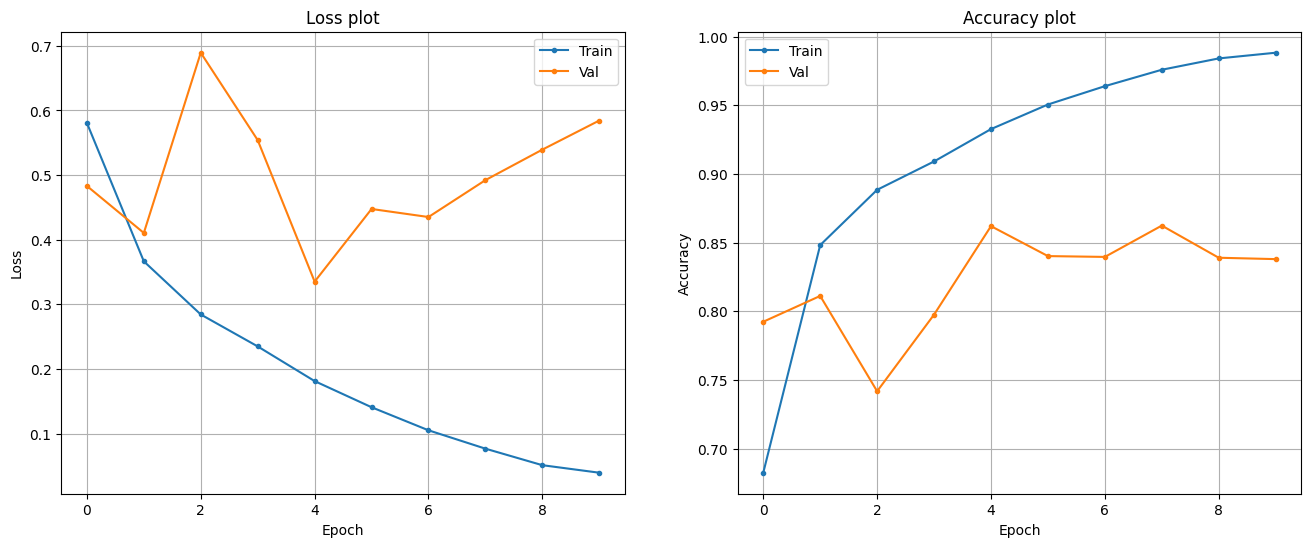

In [5]:
import matplotlib.pyplot as plt
plt.figure(figsize = (16,6))
ax1 = plt.subplot(1,2,1)
ax1.plot(history_dict['loss'],".-")
ax1.plot(history_dict['val_loss'],".-")
ax1.set_title("Loss plot")
ax1.set_xlabel("Epoch")
ax1.set_ylabel("Loss")
ax1.legend(["Train", "Val"])
ax1.grid()

ax2 = plt.subplot(1,2,2)
ax2.plot(history_dict['accuracy'],".-")
ax2.plot(history_dict['val_accuracy'],".-")
ax2.set_title("Accuracy plot")
ax2.set_xlabel("Epoch")
ax2.set_ylabel("Accuracy")
ax2.legend(["Train", "Val"])
ax2.grid()

In [6]:
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing import sequence

#Import IMDB dataset:
(input_train, y_train), (input_test, y_test) = imdb.load_data(num_words=10000)

#Pad sequences:
print('Pad sequences (samples x time)')
input_train = sequence.pad_sequences(input_train, maxlen=500)
input_test = sequence.pad_sequences(input_test, maxlen=500)
print('input_train shape:', input_train.shape)
print('input_test shape:', input_test.shape)

Pad sequences (samples x time)
input_train shape: (25000, 500)
input_test shape: (25000, 500)


In [7]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, Dense

model1 = Sequential()
model1.add(Embedding(10000, 32))
model1.add(SimpleRNN(32, return_sequences=True))
model1.add(SimpleRNN(32, return_sequences=True))
model1.add(SimpleRNN(32))
model1.add(Dense(1, activation = "sigmoid"))
model1.compile(optimizer = "rmsprop", loss = "binary_crossentropy", metrics= ["accuracy"])
model1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, None, 32)          320000    
                                                                 
 simple_rnn_1 (SimpleRNN)    (None, None, 32)          2080      
                                                                 
 simple_rnn_2 (SimpleRNN)    (None, None, 32)          2080      
                                                                 
 simple_rnn_3 (SimpleRNN)    (None, 32)                2080      
                                                                 
 dense_1 (Dense)             (None, 1)                 33        
                                                                 
Total params: 326273 (1.24 MB)
Trainable params: 326273 (1.24 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [8]:
history1 = model1.fit(input_train, y_train, epochs= 10, batch_size= 128, validation_split = 0.2)

Epoch 1/10
157/157 [==============================] - 217s 1s/step - loss: 0.6637 - accuracy: 0.5781 - val_loss: 0.6380 - val_accuracy: 0.6424
Epoch 2/10
157/157 [==============================] - 207s 1s/step - loss: 0.4113 - accuracy: 0.8220 - val_loss: 0.3776 - val_accuracy: 0.8408
Epoch 3/10
157/157 [==============================] - 209s 1s/step - loss: 0.2906 - accuracy: 0.8845 - val_loss: 0.3792 - val_accuracy: 0.8524
Epoch 4/10
157/157 [==============================] - 207s 1s/step - loss: 0.1872 - accuracy: 0.9309 - val_loss: 0.4696 - val_accuracy: 0.8058
Epoch 5/10
157/157 [==============================] - 208s 1s/step - loss: 0.1059 - accuracy: 0.9625 - val_loss: 0.5878 - val_accuracy: 0.8276
Epoch 6/10
157/157 [==============================] - 209s 1s/step - loss: 0.0541 - accuracy: 0.9822 - val_loss: 1.1917 - val_accuracy: 0.7436
Epoch 7/10
157/157 [==============================] - 205s 1s/step - loss: 0.0355 - accuracy: 0.9886 - val_loss: 0.8924 - val_accuracy: 0.7872

In [9]:
history_dict = history1.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

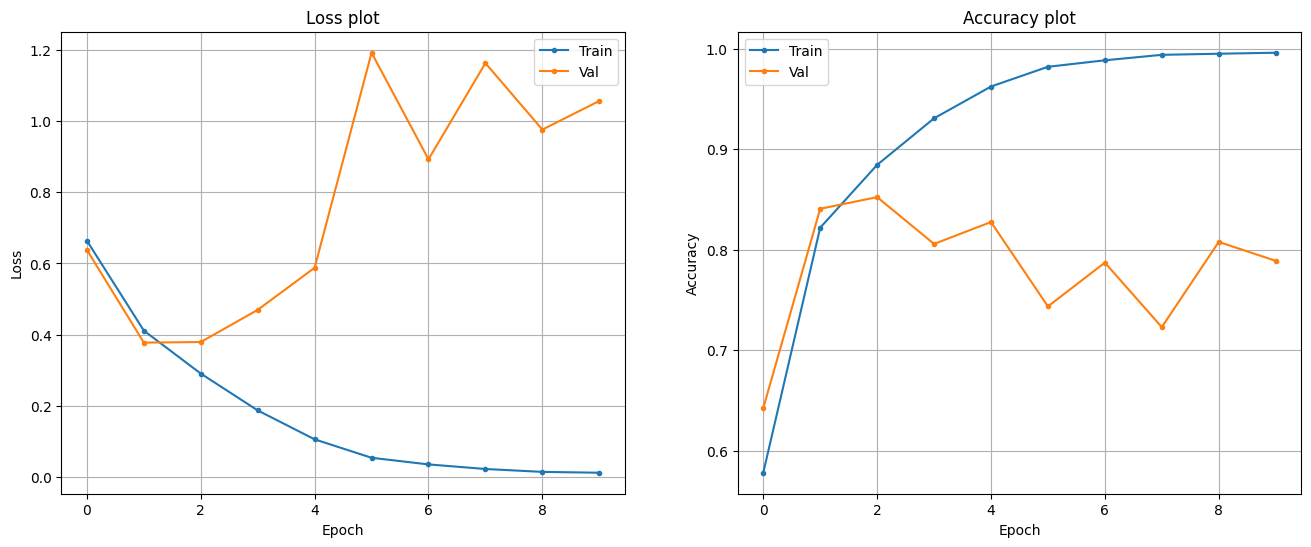

In [10]:
import matplotlib.pyplot as plt
plt.figure(figsize = (16,6))
ax1 = plt.subplot(1,2,1)
ax1.plot(history_dict['loss'],".-")
ax1.plot(history_dict['val_loss'],".-")
ax1.set_title("Loss plot")
ax1.set_xlabel("Epoch")
ax1.set_ylabel("Loss")
ax1.legend(["Train", "Val"])
ax1.grid()

ax2 = plt.subplot(1,2,2)
ax2.plot(history_dict['accuracy'],".-")
ax2.plot(history_dict['val_accuracy'],".-")
ax2.set_title("Accuracy plot")
ax2.set_xlabel("Epoch")
ax2.set_ylabel("Accuracy")
ax2.legend(["Train", "Val"])
ax2.grid()

In [11]:
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing import sequence

#Import IMDB dataset:
(input_train, y_train), (input_test, y_test) = imdb.load_data(num_words=10000)

#Pad sequences:
print('Pad sequences (samples x time)')
input_train = sequence.pad_sequences(input_train, maxlen=500)
input_test = sequence.pad_sequences(input_test, maxlen=500)
print('input_train shape:', input_train.shape)
print('input_test shape:', input_test.shape)

Pad sequences (samples x time)
input_train shape: (25000, 500)
input_test shape: (25000, 500)


In [12]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, Dense, LSTM

model2 = Sequential()
model2.add(Embedding(10000, 32))
model2.add(LSTM(32))
model2.add(Dense(1, activation = "sigmoid"))
model2.compile(optimizer = "rmsprop", loss = "binary_crossentropy", metrics= ["accuracy"])
model2.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, None, 32)          320000    
                                                                 
 lstm (LSTM)                 (None, 32)                8320      
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 328353 (1.25 MB)
Trainable params: 328353 (1.25 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [13]:
history2 = model2.fit(input_train, y_train, epochs= 10, batch_size= 128, validation_split = 0.2)

Epoch 1/10
157/157 [==============================] - 19s 112ms/step - loss: 0.6122 - accuracy: 0.6528 - val_loss: 0.4900 - val_accuracy: 0.7818
Epoch 2/10
157/157 [==============================] - 11s 67ms/step - loss: 0.3735 - accuracy: 0.8463 - val_loss: 0.3813 - val_accuracy: 0.8386
Epoch 3/10
157/157 [==============================] - 9s 54ms/step - loss: 0.2821 - accuracy: 0.8909 - val_loss: 0.3843 - val_accuracy: 0.8400
Epoch 4/10
157/157 [==============================] - 6s 38ms/step - loss: 0.2367 - accuracy: 0.9097 - val_loss: 0.4533 - val_accuracy: 0.8454
Epoch 5/10
157/157 [==============================] - 6s 39ms/step - loss: 0.2111 - accuracy: 0.9220 - val_loss: 0.3270 - val_accuracy: 0.8618
Epoch 6/10
157/157 [==============================] - 5s 33ms/step - loss: 0.1861 - accuracy: 0.9318 - val_loss: 0.3934 - val_accuracy: 0.8508
Epoch 7/10
157/157 [==============================] - 6s 38ms/step - loss: 0.1697 - accuracy: 0.9405 - val_loss: 0.3087 - val_accuracy: 0.8

In [14]:
history_dict = history2.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

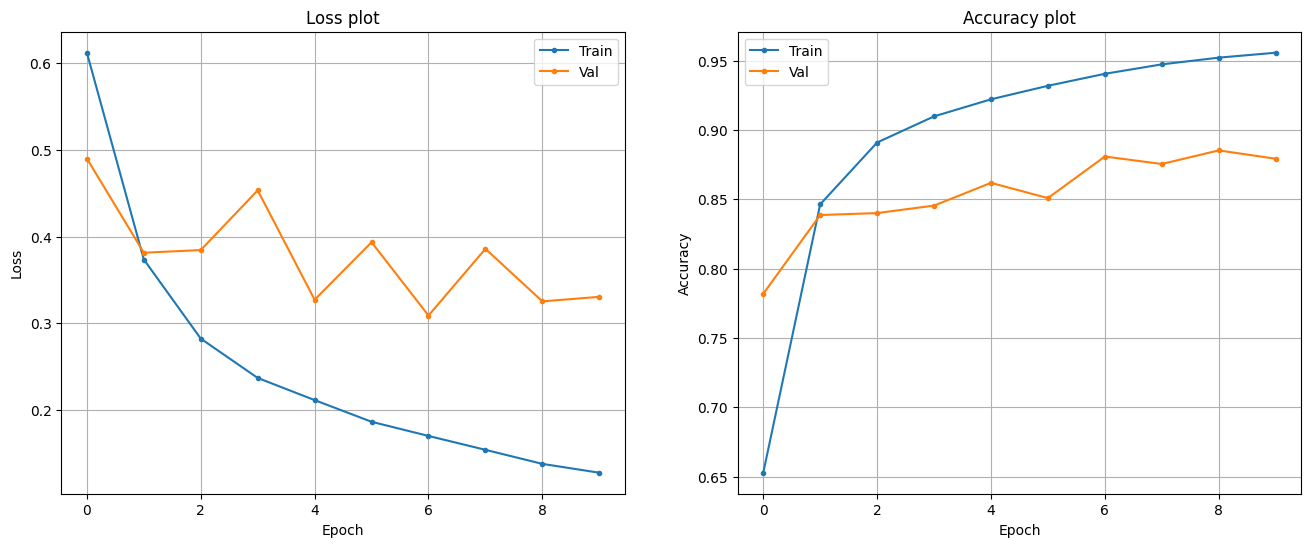

In [15]:
import matplotlib.pyplot as plt
plt.figure(figsize = (16,6))
ax1 = plt.subplot(1,2,1)
ax1.plot(history_dict['loss'],".-")
ax1.plot(history_dict['val_loss'],".-")
ax1.set_title("Loss plot")
ax1.set_xlabel("Epoch")
ax1.set_ylabel("Loss")
ax1.legend(["Train", "Val"])
ax1.grid()

ax2 = plt.subplot(1,2,2)
ax2.plot(history_dict['accuracy'],".-")
ax2.plot(history_dict['val_accuracy'],".-")
ax2.set_title("Accuracy plot")
ax2.set_xlabel("Epoch")
ax2.set_ylabel("Accuracy")
ax2.legend(["Train", "Val"])
ax2.grid()